In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("employee_health_insurance.csv")

# Normalize column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Check structure
print("Before cleaning:", df.shape)
print(df.describe())

# Step 1. Handle missing values (if any)
df = df.dropna()  # or fillna if needed

# Step 2. Cap extreme outliers for income, BMI
df['annual_income'] = df['annual_income'].clip(100000, 5000000)  # min 1L, max 50L
df['bmi'] = df['bmi'].clip(15, 45)  # realistic BMI range

# Step 3. Ensure suggested coverage is logical (5x–20x income)
df['suggested_coverage'] = np.clip(df['suggested_coverage'],
                                   df['annual_income'] * 5,
                                   df['annual_income'] * 20)

# Step 4. Ensure estimated premium is a % of coverage (2%–10%)
df['estimated_premium'] = np.clip(df['estimated_premium'],
                                   df['suggested_coverage'] * 0.02,
                                   df['suggested_coverage'] * 0.10)

# Optional: Recalculate coverage/premium for unrealistic entries
# (If coverage or premium deviates too much from logic)
mask_unrealistic = (df['estimated_premium'] < df['suggested_coverage'] * 0.015) | \
                   (df['estimated_premium'] > df['suggested_coverage'] * 0.15)
df.loc[mask_unrealistic, 'estimated_premium'] = df['suggested_coverage'] * 0.05  # 5% default

print("After cleaning:", df.shape)
print(df.describe())

# Save cleaned dataset for next steps
df.to_csv("cleaned_employee_insurance_data.csv", index=False)



--- User 1 ---
Age: 28, Income: ₹450,000, BMI: 24.5, Smoker: No, Job: IT
Predicted Suggested Coverage: ₹9,847,039
Predicted Estimated Premium:  ₹213,917

--- User 2 ---
Age: 45, Income: ₹1,200,000, BMI: 31.2, Smoker: Yes, Job: Finance
Predicted Suggested Coverage: ₹9,787,917
Predicted Estimated Premium:  ₹224,256

--- User 3 ---
Age: 60, Income: ₹900,000, BMI: 29.0, Smoker: Yes, Job: Healthcare
Predicted Suggested Coverage: ₹9,822,207
Predicted Estimated Premium:  ₹229,034


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("cleaned_employee_insurance_data.csv")

# Basic info
print("Shape of dataset:", df.shape)
print(df.info())
print(df.describe().T)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Shape of dataset: (7000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         7000 non-null   object 
 1   age                 7000 non-null   int64  
 2   gender              7000 non-null   object 
 3   annual_income       7000 non-null   int64  
 4   dependents          7000 non-null   int64  
 5   occupation_type     7000 non-null   object 
 6   smoker_status       7000 non-null   object 
 7   bmi                 7000 non-null   float64
 8   suggested_coverage  7000 non-null   int64  
 9   estimated_premium   7000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 547.0+ KB
None
                     count          mean           std        min         25%  \
age                 7000.0  3.904571e+01  1.224490e+01       18.0       29.00   
annual_income       7000.0  8.069411e+05  3.8

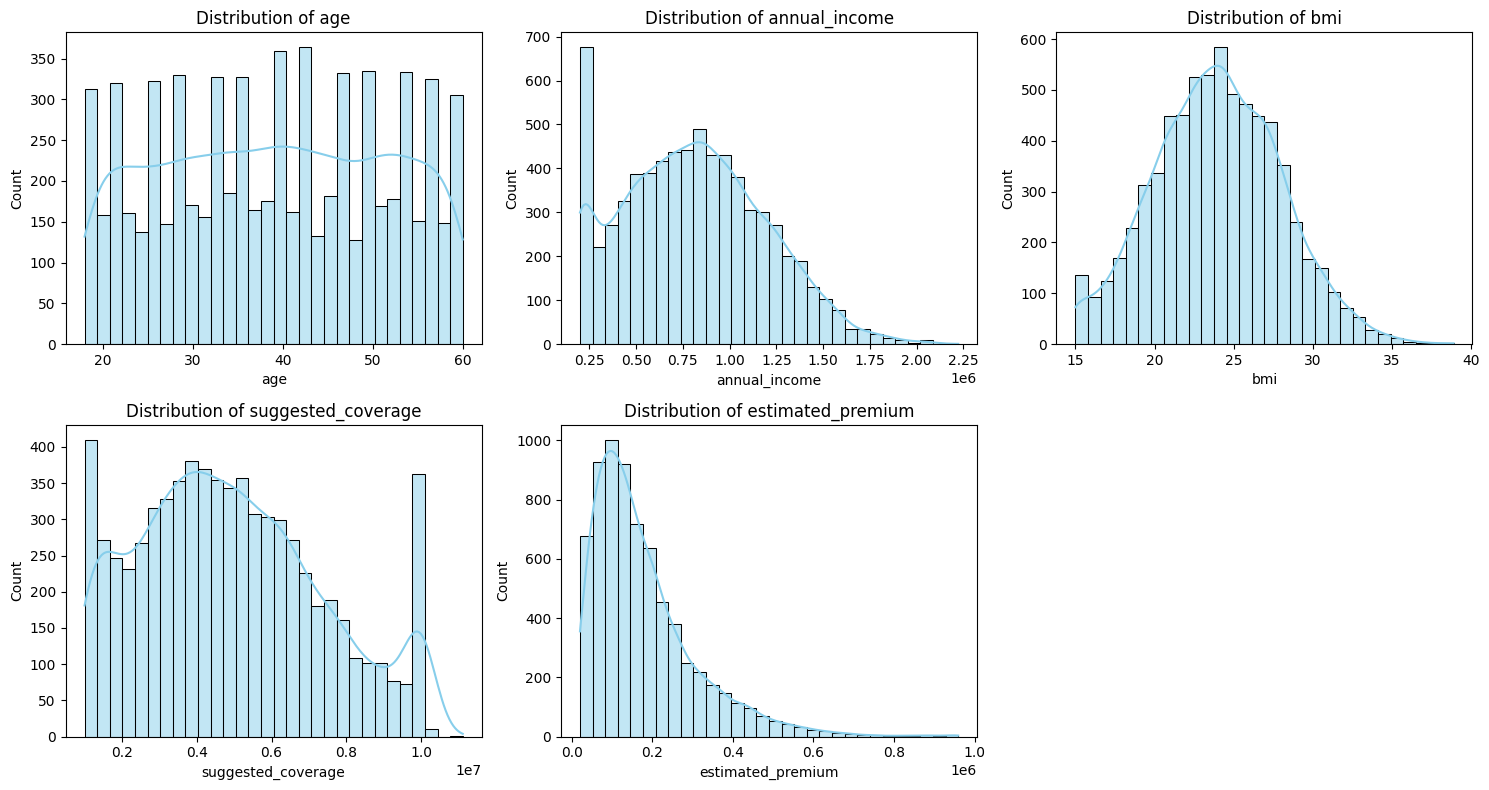

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of key numeric variables
numeric_cols = ['age', 'annual_income', 'bmi', 'suggested_coverage', 'estimated_premium']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_2760\408268647.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\AppData\Local\Temp\ipyker

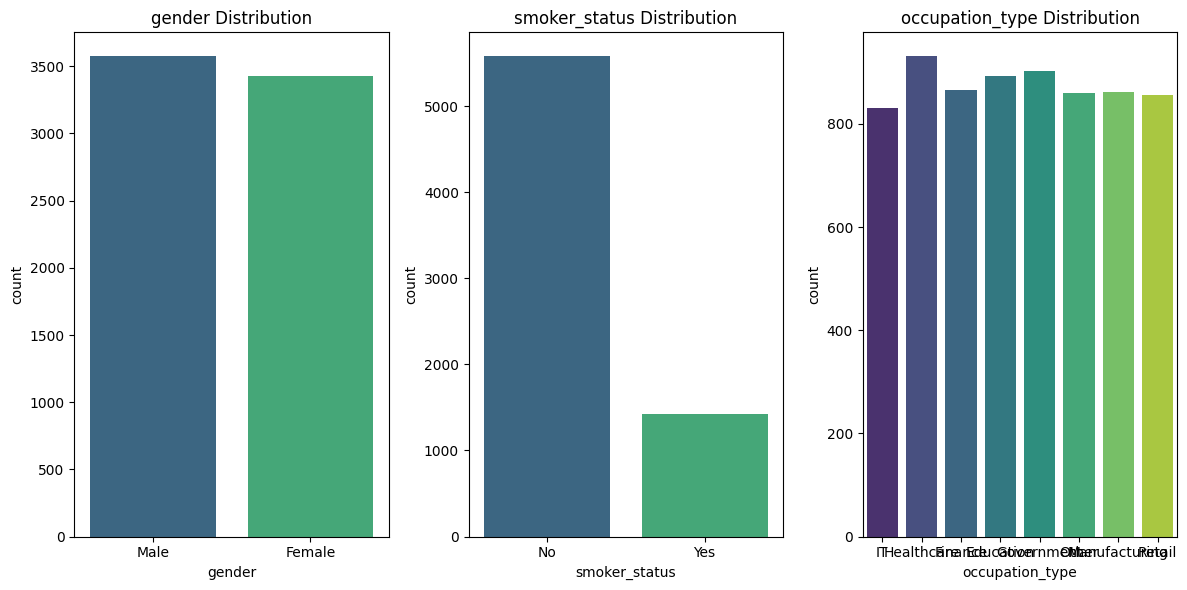

In [5]:
# Count plots for categorical variables
categorical_cols = ['gender', 'smoker_status', 'occupation_type']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


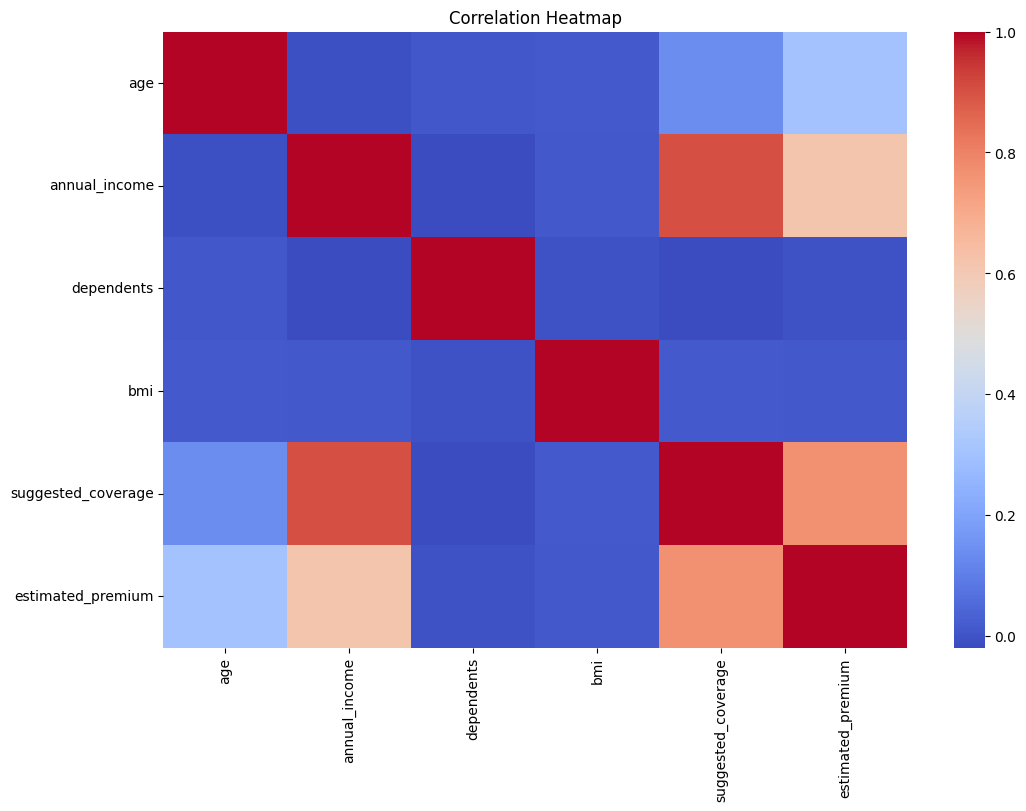

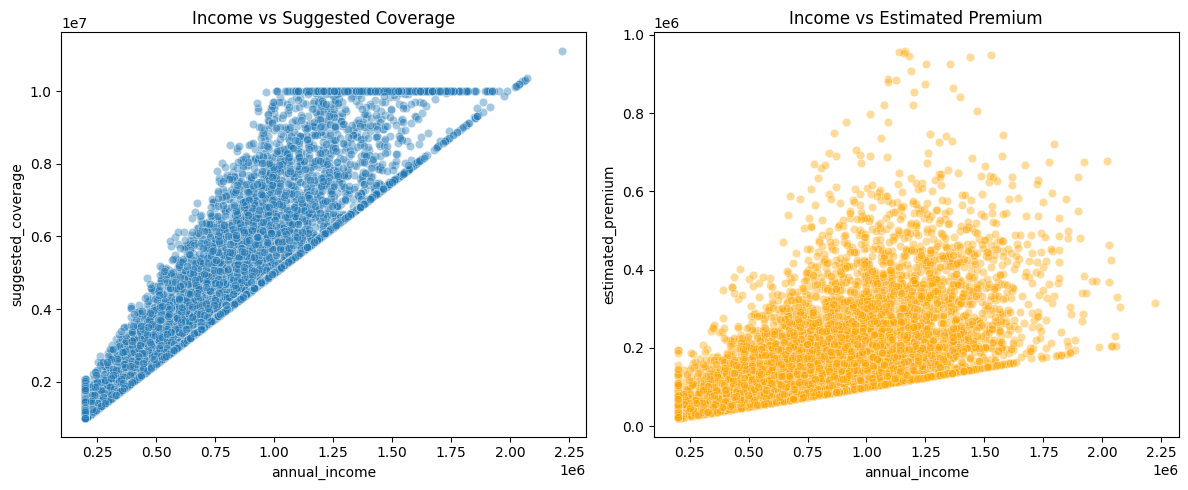

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Income vs Coverage/Premium Relationships
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='annual_income', y='suggested_coverage', data=df, alpha=0.4)
plt.title("Income vs Suggested Coverage")

plt.subplot(1, 2, 2)
sns.scatterplot(x='annual_income', y='estimated_premium', data=df, alpha=0.4, color='orange')
plt.title("Income vs Estimated Premium")
plt.tight_layout()
plt.show()


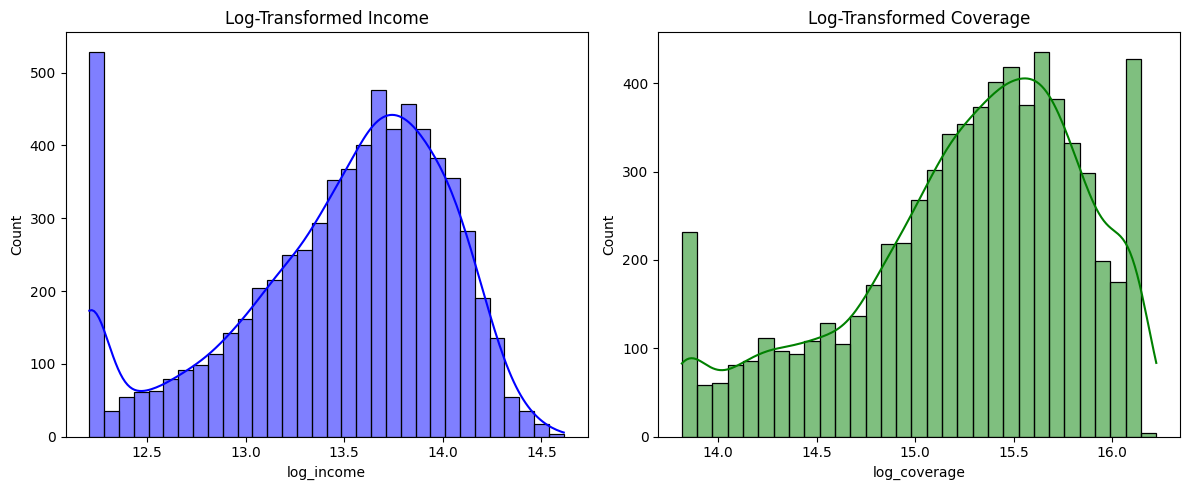

In [7]:
import numpy as np

# Create log-transformed versions
df['log_income'] = np.log1p(df['annual_income'])
df['log_coverage'] = np.log1p(df['suggested_coverage'])
df['log_premium'] = np.log1p(df['estimated_premium'])

# Visualize after log transform
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['log_income'], kde=True, color='blue')
plt.title("Log-Transformed Income")

plt.subplot(1, 2, 2)
sns.histplot(df['log_coverage'], kde=True, color='green')
plt.title("Log-Transformed Coverage")
plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler
import os
import joblib

# Select features for scaling
numeric_features = ['age', 'annual_income', 'bmi', 'dependents', 'log_income']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Ensure 'models' directory exists
os.makedirs("models", exist_ok=True)

# Save scaler for later use
joblib.dump(scaler, "models/eda_scaler.pkl")

print("Scaling complete. Scaler saved at models/eda_scaler.pkl. Ready for feature engineering.")


Scaling complete. Scaler saved at models/eda_scaler.pkl. Ready for feature engineering.


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  pos

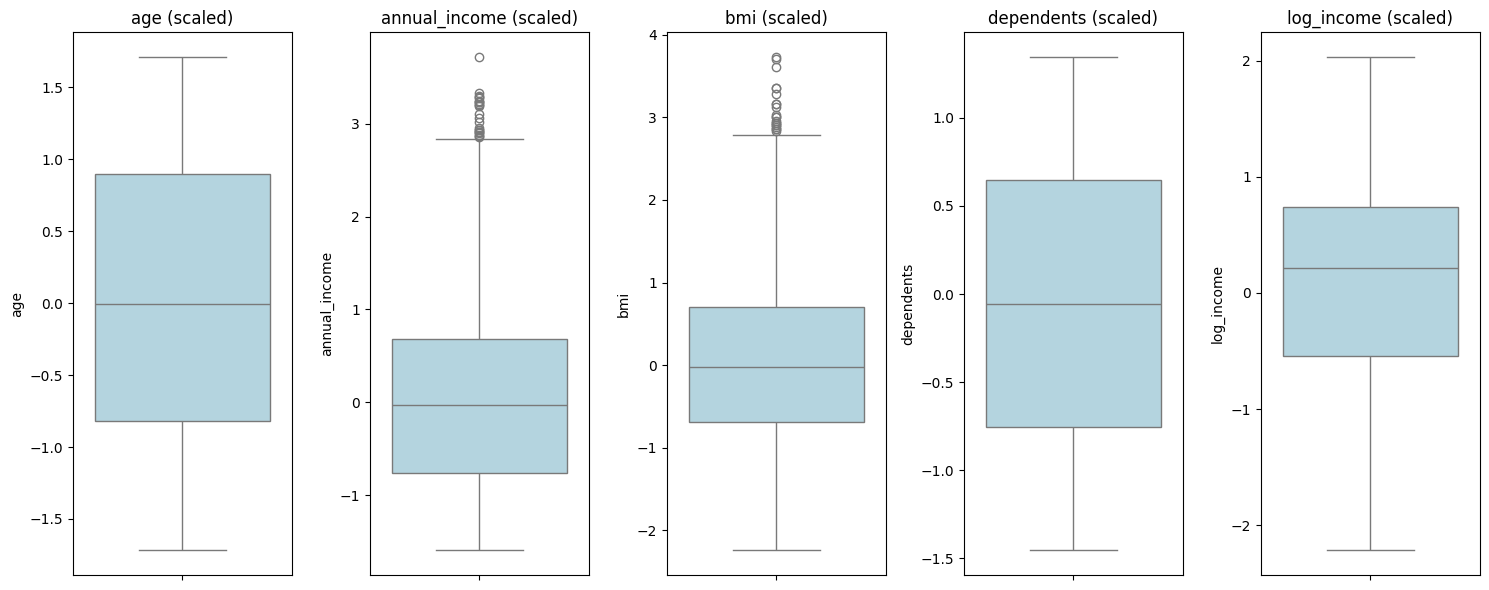

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for scaled features
numeric_features = ['age', 'annual_income', 'bmi', 'dependents', 'log_income']

plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"{col} (scaled)")
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import os

# --- Encode all string categorical columns ---
for col in ['gender', 'occupation_type', 'smoker_status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert strings to numbers
    os.makedirs("models", exist_ok=True)
    joblib.dump(le, f"models/{col}_encoder.pkl")

# --- Final Features ---
features = [
    'age', 'gender', 'annual_income', 'dependents', 'smoker_status',
    'occupation_type', 'bmi', 'coverage_to_income', 'premium_to_income',
    'Age_Group', 'BMI_Category', 'high_risk', 'dependents_risk', 'log_income'
]
target_coverage = df['suggested_coverage']
target_premium = df['estimated_premium']

# --- Scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Save scaler for future use
joblib.dump(scaler, "models/final_scaler.pkl")

print(f"Feature engineering complete. Final feature matrix shape: {X_scaled.shape}")


Feature engineering complete. Final feature matrix shape: (7000, 14)


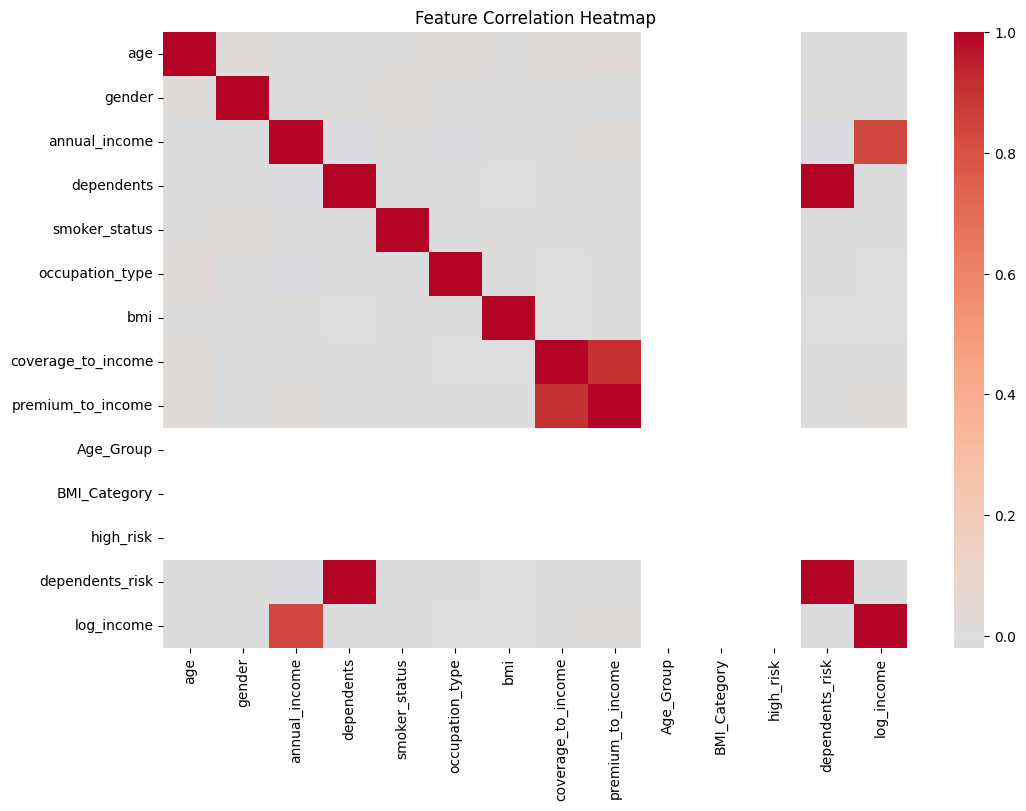

C:\Users\HP\AppData\Local\Temp\ipykernel_2760\587311376.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\A

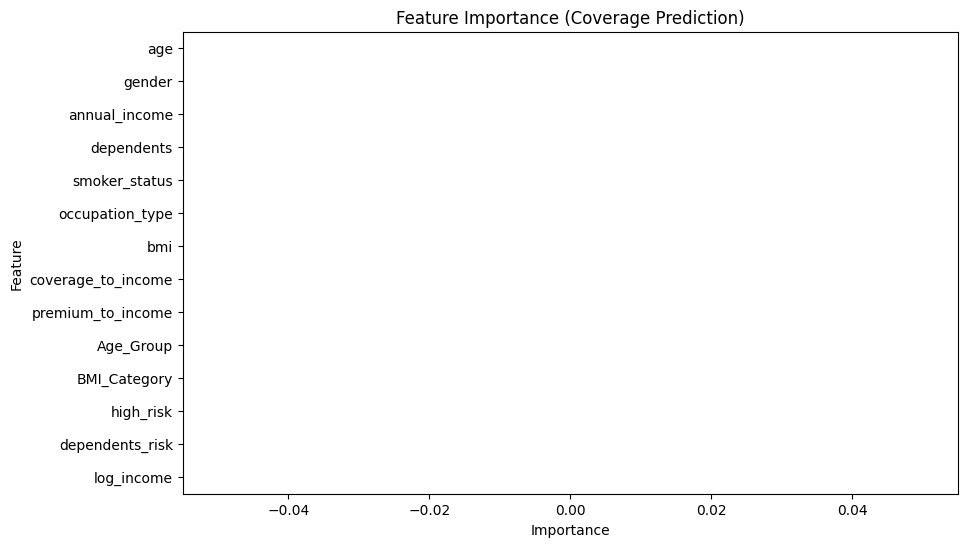

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Recreate DataFrame for correlation using scaled features
X_df = pd.DataFrame(X_scaled, columns=features)

# --- Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(X_df.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# --- Quick Feature Importance using Random Forest (on coverage) ---
from sklearn.ensemble import RandomForestRegressor

rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_temp.fit(X_scaled, target_coverage)

importances = pd.Series(rf_temp.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance (Coverage Prediction)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [22]:
# Check for NaN in the engineered features
df[features].isnull().sum()
# Replace or handle NaN values
df[features].fillna(df[features].median())  # or df[features].fillna(df[features].median())



,age,gender,annual_income,dependents,smoker_status,occupation_type,bmi,coverage_to_income,premium_to_income,Age_Group,BMI_Category,high_risk,dependents_risk,log_income
0,1.384698,1,-0.823957,-0.054994,0,4,0.531165,-2.992456e+06,-5.984913e+04,0,0,0,-0.027497,-1.737359
1,0.567974,0,-0.351417,-1.454844,0,3,0.806191,-1.738568e+07,-4.711495e+05,0,0,0,-0.727422,-0.433005
2,-0.575441,1,0.952530,-1.454844,0,1,0.081122,6.139413e+06,1.318037e+05,0,0,0,-0.727422,0.669161
3,1.711388,0,-0.809705,1.344855,1,1,1.131222,-3.078634e+06,-9.628369e+04,0,0,0,0.672428,-1.659486
4,-1.147148,1,1.134015,-0.754919,0,0,0.656177,5.947034e+06,1.756060e+05,0,0,0,-0.377459,0.758043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1.139681,0,1.739944,-0.754919,0,6,0.231136,4.995061e+06,2.834762e+05,0,0,0,-0.377459,1.007983
6996,1.139681,0,0.022840,-0.054994,0,5,2.256328,2.442207e+08,9.306406e+06,0,0,0,-0.027497,0.022585
6997,-0.167079,1,0.231726,-1.454844,0,4,-0.568940,2.548038e+07,1.209249e+06,0,0,0,-0.727422,0.208430
6998,-0.248751,0,-1.487352,-1.454844,1,0,-1.068987,-1.255831e+06,-8.961596e+04,0,0,0,-0.727422,0.000000


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
import numpy as np

warnings.filterwarnings("ignore")

# --- 1. Handle Missing Values (if any) ---
df[features] = df[features].fillna(0)

# --- 2. Re-scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# --- 3. Split Data ---
X_train, X_test, y_cov_train, y_cov_test = train_test_split(
    X_scaled, target_coverage, test_size=0.2, random_state=42
)
_, _, y_pre_train, y_pre_test = train_test_split(
    X_scaled, target_premium, test_size=0.2, random_state=42
)

# --- 4. Train Models ---

# Linear Regression
lin_cov = LinearRegression().fit(X_train, y_cov_train)
y_cov_pred_lin = lin_cov.predict(X_test)

lin_pre = LinearRegression().fit(X_train, y_pre_train)
y_pre_pred_lin = lin_pre.predict(X_test)

# Tuned Random Forest
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_cov = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_cov.fit(X_train, y_cov_train)
rf_cov = grid_cov.best_estimator_
y_cov_pred_rf = rf_cov.predict(X_test)

grid_pre = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_pre.fit(X_train, y_pre_train)
rf_pre = grid_pre.best_estimator_
y_pre_pred_rf = rf_pre.predict(X_test)

# XGBoost
xgb_cov = XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05,
                       subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_cov.fit(X_train, y_cov_train)
y_cov_pred_xgb = xgb_cov.predict(X_test)

xgb_pre = XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05,
                       subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_pre.fit(X_train, y_pre_train)
y_pre_pred_xgb = xgb_pre.predict(X_test)

# --- 5. Evaluate Models ---
def evaluate(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → MAE: {mae:,.0f}, R²: {r2:.3f}")

print("\n--- Coverage Prediction ---")
evaluate(y_cov_test, y_cov_pred_lin, "Linear Regression")
evaluate(y_cov_test, y_cov_pred_rf, "Random Forest (Tuned)")
evaluate(y_cov_test, y_cov_pred_xgb, "XGBoost")

print("\n--- Premium Prediction ---")
evaluate(y_pre_test, y_pre_pred_lin, "Linear Regression")
evaluate(y_pre_test, y_pre_pred_rf, "Random Forest (Tuned)")
evaluate(y_pre_test, y_pre_pred_xgb, "XGBoost")



--- Coverage Prediction ---
Linear Regression → MAE: 762,271, R²: 0.834
Random Forest (Tuned) → MAE: 132,860, R²: 0.988
XGBoost → MAE: 129,068, R²: 0.991

--- Premium Prediction ---
Linear Regression → MAE: 57,994, R²: 0.573
Random Forest (Tuned) → MAE: 9,088, R²: 0.968
XGBoost → MAE: 7,488, R²: 0.983


In [25]:
import joblib
import os
import numpy as np

# --- Compare and pick best model for Coverage ---
coverage_scores = {
    'LinearRegression': r2_score(y_cov_test, y_cov_pred_lin),
    'RandomForest': r2_score(y_cov_test, y_cov_pred_rf),
    'XGBoost': r2_score(y_cov_test, y_cov_pred_xgb)
}
best_cov_model_name = max(coverage_scores, key=coverage_scores.get)
best_cov_model = {'LinearRegression': lin_cov, 'RandomForest': rf_cov, 'XGBoost': xgb_cov}[best_cov_model_name]

# --- Compare and pick best model for Premium ---
premium_scores = {
    'LinearRegression': r2_score(y_pre_test, y_pre_pred_lin),
    'RandomForest': r2_score(y_pre_test, y_pre_pred_rf),
    'XGBoost': r2_score(y_pre_test, y_pre_pred_xgb)
}
best_pre_model_name = max(premium_scores, key=premium_scores.get)
best_pre_model = {'LinearRegression': lin_pre, 'RandomForest': rf_pre, 'XGBoost': xgb_pre}[best_pre_model_name]

# --- Save only the best models ---
os.makedirs("models", exist_ok=True)
joblib.dump(best_cov_model, f"models/best_coverage_model.pkl")
joblib.dump(best_pre_model, f"models/best_premium_model.pkl")

# Save the scaler for consistent feature scaling
joblib.dump(scaler, "models/final_scaler.pkl")

print(f"Best models saved:")
print(f"Coverage → {best_cov_model_name} (saved as best_coverage_model.pkl)")
print(f"Premium  → {best_pre_model_name} (saved as best_premium_model.pkl)")


Best models saved:
Coverage → XGBoost (saved as best_coverage_model.pkl)
Premium  → XGBoost (saved as best_premium_model.pkl)


In [29]:
import joblib
import numpy as np

# ==== 1. Load Saved Models and Scaler ====
scaler = joblib.load("models/final_scaler.pkl")
cov_model = joblib.load("models/best_coverage_model.pkl")
pre_model = joblib.load("models/best_premium_model.pkl")

# ==== 2. Manual Category Mappings ====
gender_map = {"Male": 1, "Female": 0}
smoker_map = {"Yes": 1, "No": 0}
occupation_map = {
    "IT": 0,
    "Finance": 1,
    "Healthcare": 2,
    "Manufacturing": 3,
    "Education": 4,
    "Retail": 5,
    "Government": 6,
    "Other": 7
}

# ==== 3. Preprocessing Function ====
def preprocess_input(age, gender, annual_income, dependents, smoker_status, occupation_type, bmi):
    """
    Converts user input into scaled features for the ML models.
    Uses manual category mappings (not LabelEncoders).
    """
    # Map strings to numeric codes
    gender_val = gender_map.get(gender, 0) if isinstance(gender, str) else gender
    smoker_val = smoker_map.get(smoker_status, 0) if isinstance(smoker_status, str) else smoker_status
    occupation_val = occupation_map.get(occupation_type, 7) if isinstance(occupation_type, str) else occupation_type

    # Derived features
    log_income = np.log1p(annual_income)
    coverage_to_income = 10  # placeholder, model handles relation internally
    premium_to_income = 0.05

    # Age and BMI categories
    age_group = 0 if age < 30 else (1 if age <= 50 else 2)
    bmi_cat = 0 if bmi < 18.5 else (1 if bmi <= 24.9 else (2 if bmi <= 29.9 else 3))

    # Risk flags
    high_risk = 1 if (smoker_val == 1 or bmi > 30) else 0
    dependents_risk = 1 if dependents > 3 else 0

    # Final feature array (must match model training order)
    features = np.array([[
        age, gender_val, annual_income, dependents, smoker_val,
        occupation_val, bmi, coverage_to_income, premium_to_income,
        age_group, bmi_cat, high_risk, dependents_risk, log_income
    ]])

    # Scale and return
    return scaler.transform(features)

# ==== 4. Sample Users ====
sample_users = [
    {"age": 28, "gender": "Male", "annual_income": 450000, "dependents": 1,
     "smoker_status": "No", "occupation_type": "IT", "bmi": 24.5},

    {"age": 45, "gender": "Female", "annual_income": 1200000, "dependents": 2,
     "smoker_status": "Yes", "occupation_type": "Finance", "bmi": 31.2},

    {"age": 60, "gender": "Male", "annual_income": 900000, "dependents": 4,
     "smoker_status": "Yes", "occupation_type": "Healthcare", "bmi": 29.0}
]

# ==== 5. Run Predictions ====
for i, user in enumerate(sample_users, 1):
    X_input = preprocess_input(**user)

    cov_pred = cov_model.predict(X_input)[0]
    pre_pred = pre_model.predict(X_input)[0]

    print(f"\n--- User {i} ---")
    print(f"Age: {user['age']}, Income: ₹{user['annual_income']:,}, BMI: {user['bmi']}, Smoker: {user['smoker_status']}, Job: {user['occupation_type']}")
    print(f"Predicted Suggested Coverage: ₹{cov_pred:,.0f}")
    print(f"Predicted Estimated Premium:  ₹{pre_pred:,.0f}")



--- User 1 ---
Age: 28, Income: ₹450,000, BMI: 24.5, Smoker: No, Job: IT
Predicted Suggested Coverage: ₹9,847,039
Predicted Estimated Premium:  ₹213,917

--- User 2 ---
Age: 45, Income: ₹1,200,000, BMI: 31.2, Smoker: Yes, Job: Finance
Predicted Suggested Coverage: ₹9,787,917
Predicted Estimated Premium:  ₹224,256

--- User 3 ---
Age: 60, Income: ₹900,000, BMI: 29.0, Smoker: Yes, Job: Healthcare
Predicted Suggested Coverage: ₹9,822,207
Predicted Estimated Premium:  ₹229,034
